<a href="https://colab.research.google.com/github/IreneLedyaeva/CAP-5610/blob/master/HW2/problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final CNN architecture with the best performance

The first CNN architecure with data augmentation performs best on the validation set with the training accuracy = 0.7352 and the validation accuracy = 0.7601. Even though the fourth model has the best training accuracy, it does not represent a good generalization.

## CNN architecture with data augmentation

### Loading the CIFAR10 data set

In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 27s 0us/step


### Encoding the labels

In [0]:
from keras.utils import to_categorical

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

### Preprocessing the data

In [0]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### Adding data augmentation
Test data should not be augmented

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training images
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(train_images)

### Building the model

In [9]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

### Compiling the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Training the model

In [11]:
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=30, verbose=1, validation_data=(test_images, test_labels), shuffle=True)

1563/1563 [==============================] - 124s 79ms/step - loss: 1.6616 - acc: 0.3977 - val_loss: 1.3330 - val_acc: 0.5149
Epoch 2/30
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3227 - acc: 0.5312 - val_loss: 1.1206 - val_acc: 0.6066
Epoch 3/30
1563/1563 [==============================] - 123s 79ms/step - loss: 1.1862 - acc: 0.5830 - val_loss: 1.0419 - val_acc: 0.6383
Epoch 4/30
1563/1563 [==============================] - 126s 80ms/step - loss: 1.1020 - acc: 0.6162 - val_loss: 1.0628 - val_acc: 0.6244
Epoch 5/30
1563/1563 [==============================] - 123s 79ms/step - loss: 1.0519 - acc: 0.6333 - val_loss: 0.9996 - val_acc: 0.6556
Epoch 6/30
1563/1563 [==============================] - 123s 79ms/step - loss: 0.9999 - acc: 0.6538 - val_loss: 0.9095 - val_acc: 0.6860
Epoch 7/30
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9639 - acc: 0.6653 - val_loss: 0.9072 - val_acc: 0.6973
Epoch 8/30
1563/1563 [==============================

The final training accuracy: 0.7374

The final test accuracy: 0.7482

### Saving the model

In [0]:
model_fname = 'model_final_augment.h5' 
model.save(model_fname)

### Downloading the model

In [0]:
from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)

### Checking overfitting

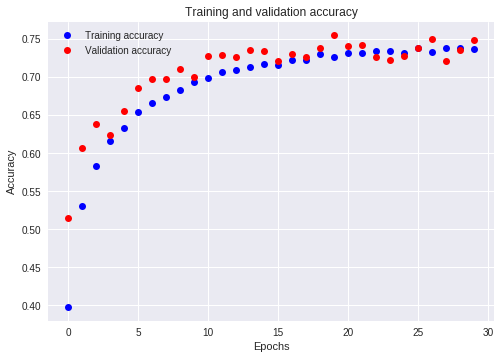

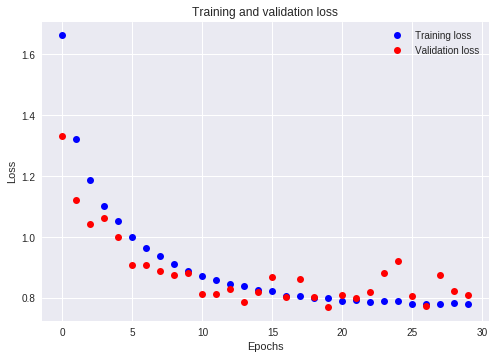

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## CNN architecture with k-fold validation and data augmentation

### Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### K-fold validation

In [3]:
from sklearn.model_selection import StratifiedKFold

folds = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=1).split(train_images, train_labels))

print('total training images:', train_images.shape[0])
print('total test images:', test_images.shape[0])

total training images: 50000
total test images: 10000


### Encoding the labels

In [0]:
from keras.utils import to_categorical

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

### Preprocessing the data

In [0]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### Adding data augmentation
Validation data should not be augmented

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training images
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(train_images)

### Building the model

In [7]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flat

### Compiling the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Training the model

In [9]:
for j, (train_idx, val_idx) in enumerate(folds):
  
  print('\nFold ',j)
  X_train_cv = train_images[train_idx]
  y_train_cv = train_labels[train_idx]
  X_valid_cv = train_images[val_idx]
  y_valid_cv = train_labels[val_idx]
  
  model.fit_generator(datagen.flow(X_train_cv, y_train_cv, batch_size = 32),
                    epochs=30, verbose=1, validation_data=(X_valid_cv, y_valid_cv), shuffle=True)
  
  print(model.evaluate(X_valid_cv, y_valid_cv))


Fold  0
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1250/1250 [==============================] - 96s 76ms/step - loss: 1.6933 - acc: 0.3809 - val_loss: 1.4455 - val_acc: 0.4814
Epoch 2/30
1250/1250 [==============================] - 95s 76ms/step - loss: 1.3813 - acc: 0.5067 - val_loss: 1.2354 - val_acc: 0.5602
Epoch 3/30
1250/1250 [==============================] - 95s 76ms/step - loss: 1.2260 - acc: 0.5661 - val_loss: 1.0992 - val_acc: 0.6216
Epoch 4/30
1250/1250 [==============================] - 96s 77ms/step - loss: 1.1381 - acc: 0.6023 - val_loss: 1.0648 - val_acc: 0.6226
Epoch 5/30
1250/1250 [==============================] - 95s 76ms/step - loss: 1.0733 - acc: 0.6257 - val_loss: 0.9983 - val_acc: 0.6542
Epoch 6/30
1250/1250 [==============================] - 95s 76ms/step - loss: 1.0201 - acc: 0.6475 - val_loss: 1.0012 - val_acc: 0.6599
Epoch 7/30
1250/1250 [==============================] - 97s 77ms/step - loss: 0.9841 - acc: 0.6600 - val_loss: 1.2392 - val_acc

### Fold 0: 0.7394
### Fold 1: 0.7425
### Fold 2: 0.7234
### Fold 3: 0.6907
### Fold 4: 0.6823

### Saving the model

In [0]:
model_fname = 'model_final_augment_kfold.h5' 
model.save(model_fname)

### Downloading the model

In [0]:
from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)

The best validation accuracy obtained by simple hold-out validation is 0.7601. The best validation accuracy obtained by k-fold validation is 0.7425. Therefore, the hold-out validation accuracy is higher than the k-fold validation.